# Delta Equity 90 Days

In [1]:
source("JupyterUtils.R")
source("C2ScoreHypothesisPresentation.R")

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        4358      170471-3434649.5000     -4.4000      0.0000    176.0007      7.90004434737.9000  27220.4770 


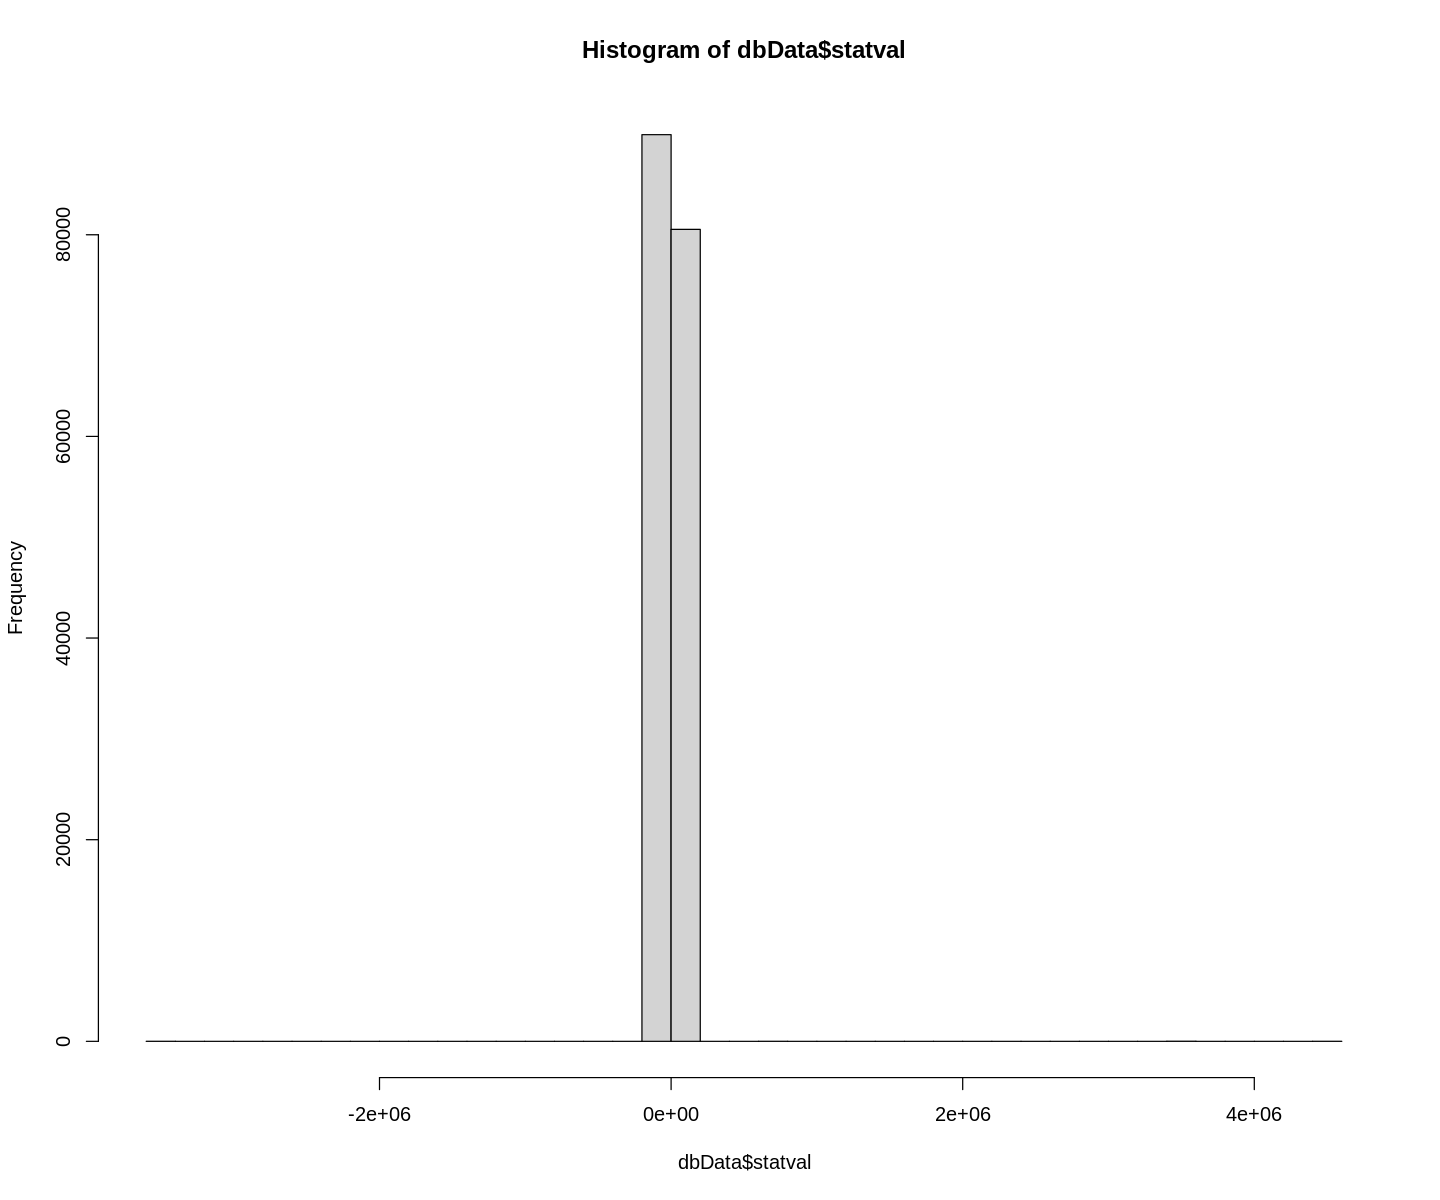

In [2]:
# What data we have.
dbData = getC2ScoreDbData("select systemid, date, statval
            from historical_stats_modern where statname='deltaequityp90'") 
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        4090      158609    -50.0000     -3.7000      0.0000      1.3227      7.0000     50.0000     14.0629 


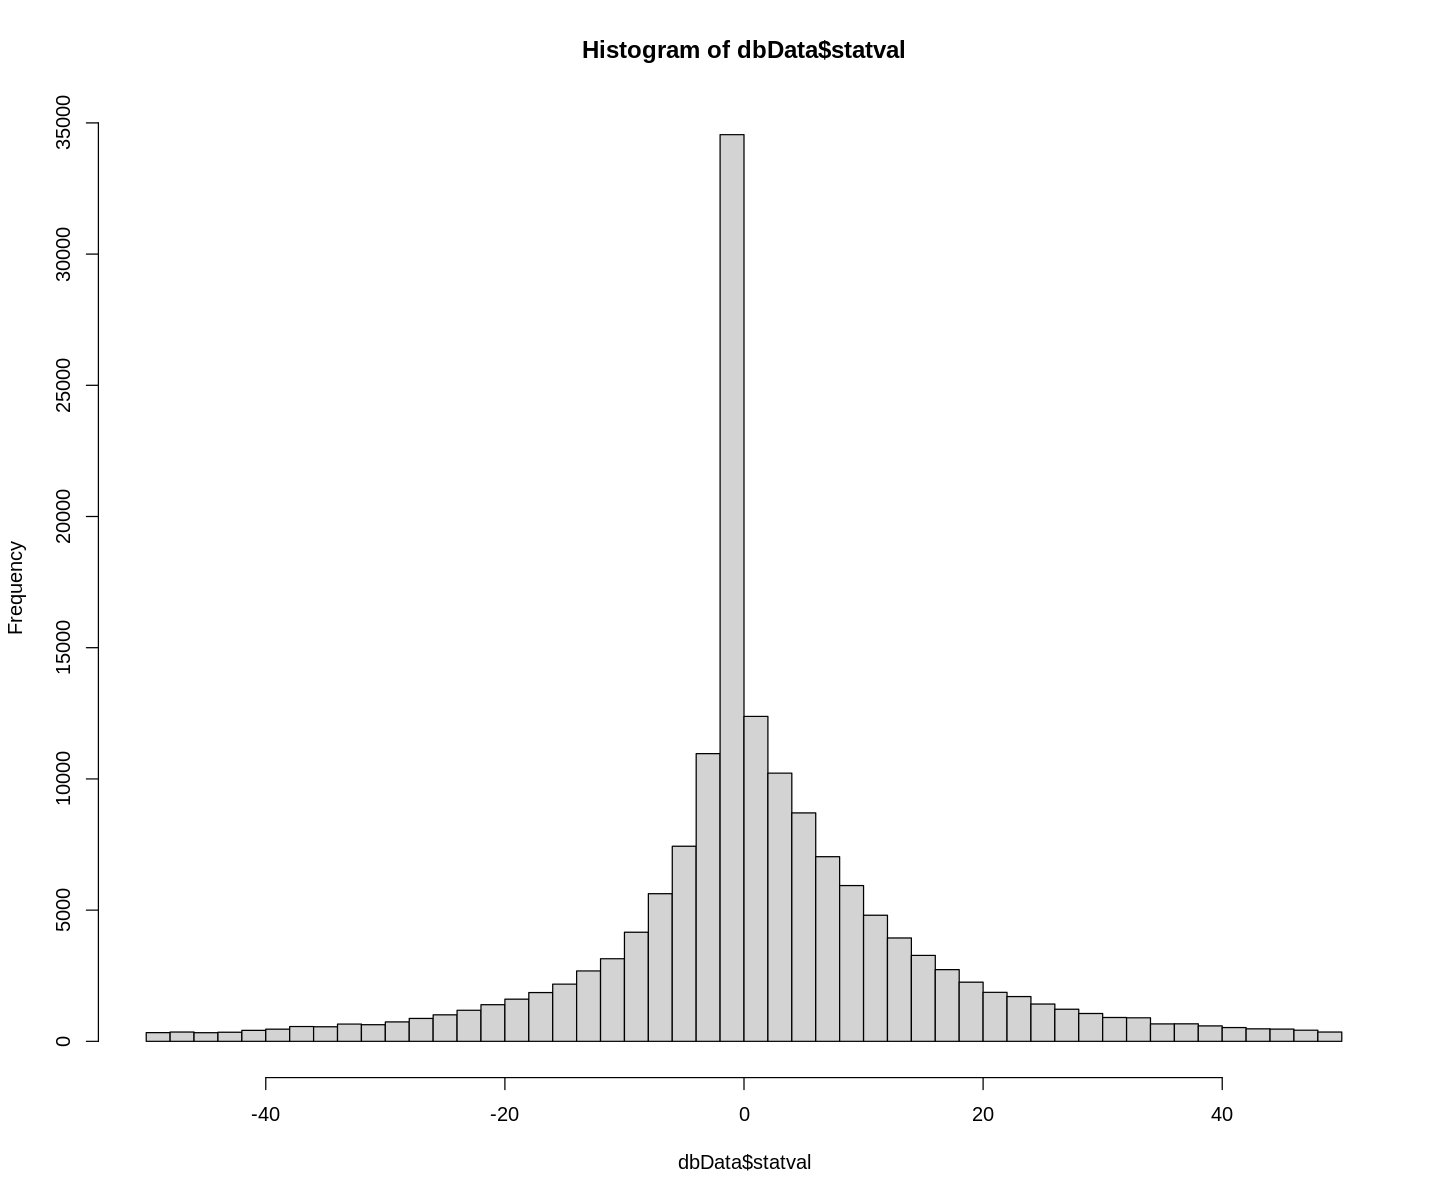

In [3]:
# Delta equity 90 days (3 month). Somewhere between -50 and +50 percent
dbData = getC2ScoreDbData("select systemid, date, statval
            from historical_stats_modern where statname='deltaequityp90' 
            and statval >= -50 and statval <= 50")
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        2126       67807    -15.0000     -1.7000      1.5000      4.4455      9.0000     50.0000     10.8313 


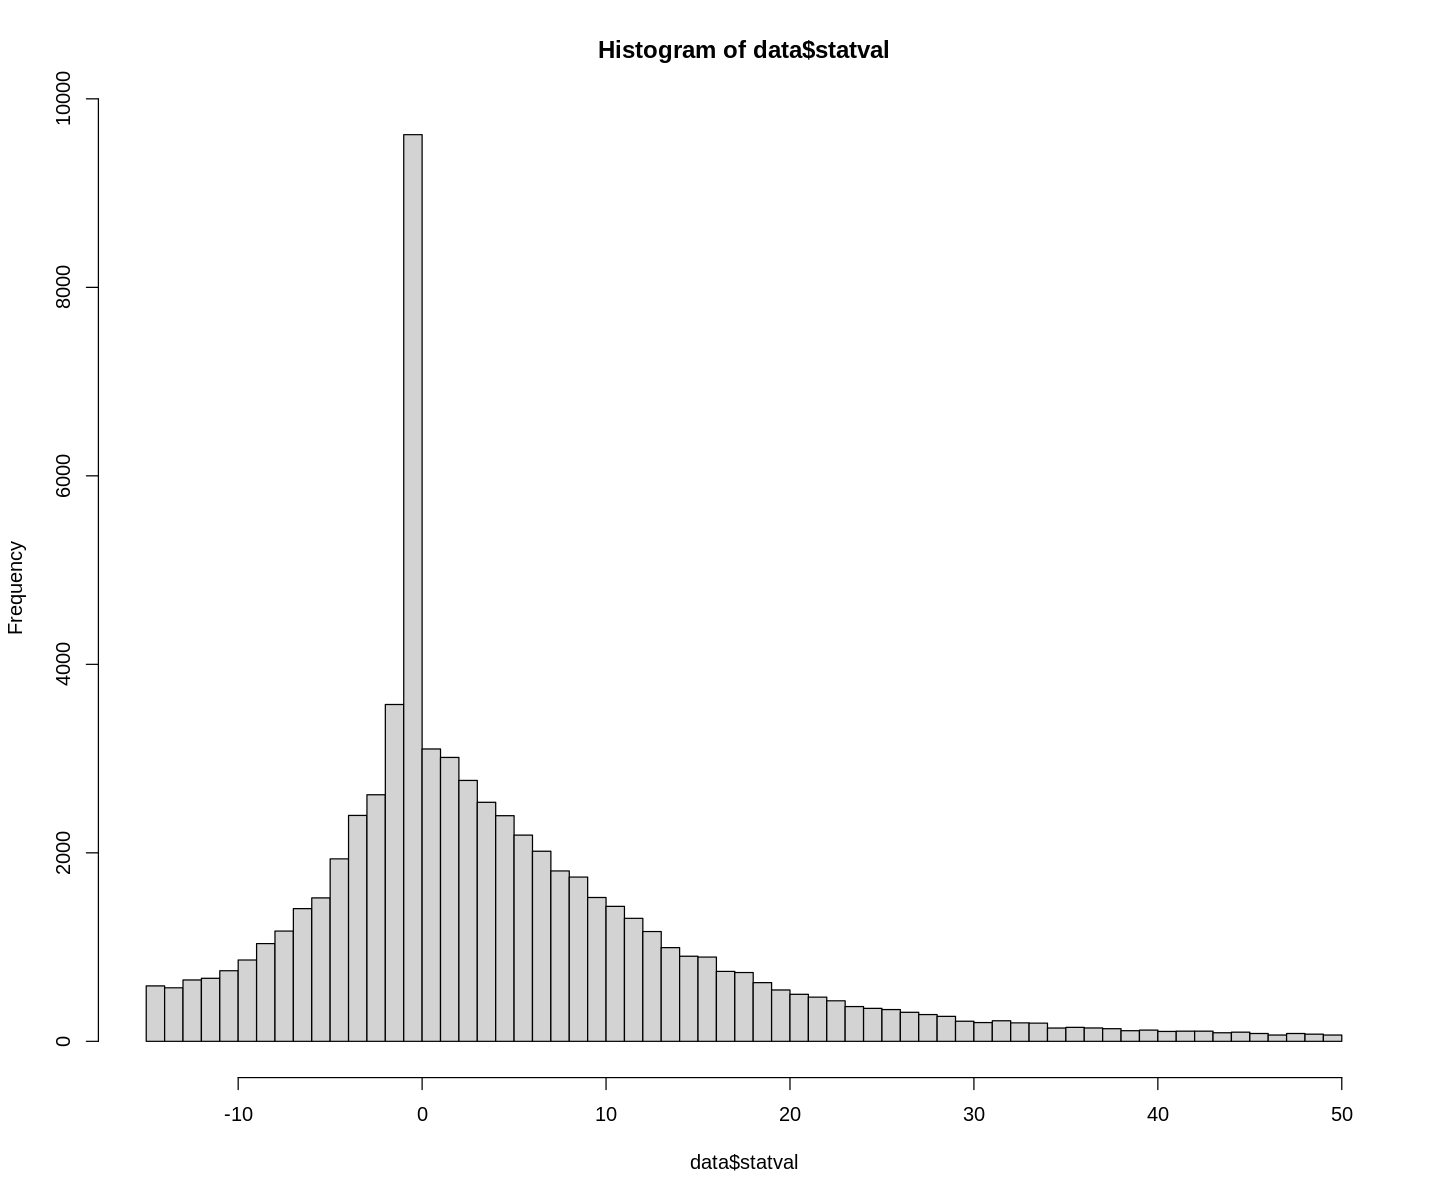

In [4]:
# Join with cleaned data. 
# Further investigation shows that we can accept small negative values too. 
sql = "select statval, eq.*
 from ReturnsDataInIntervalsCleanedSkip090 eq
 join historical_stats_modern h on h.systemid=eq.systemid and h.date = DateStart
 where statname='deltaequityp90' and  statval >= -15 and statval <= 50"

data = getC2ScoreDbData(sql)
overview(data)
hist(data$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        2126       67807    -15.0000     -1.7000      1.5000      4.4455      9.0000     50.0000     10.8313 



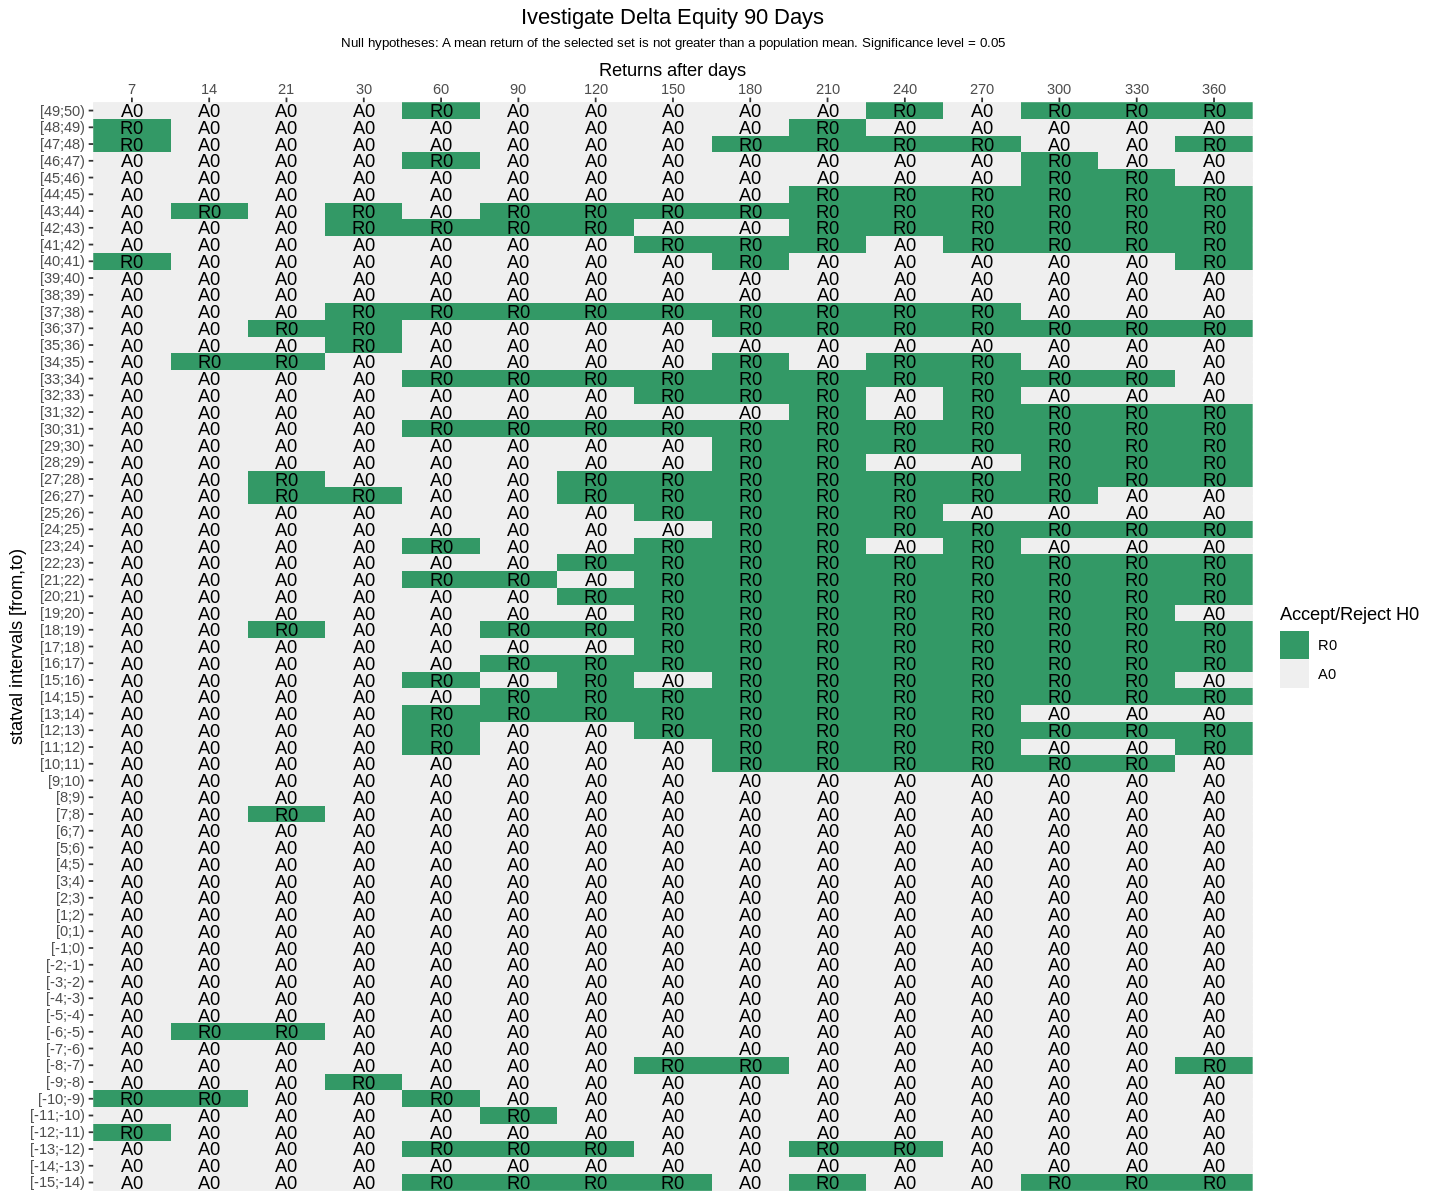

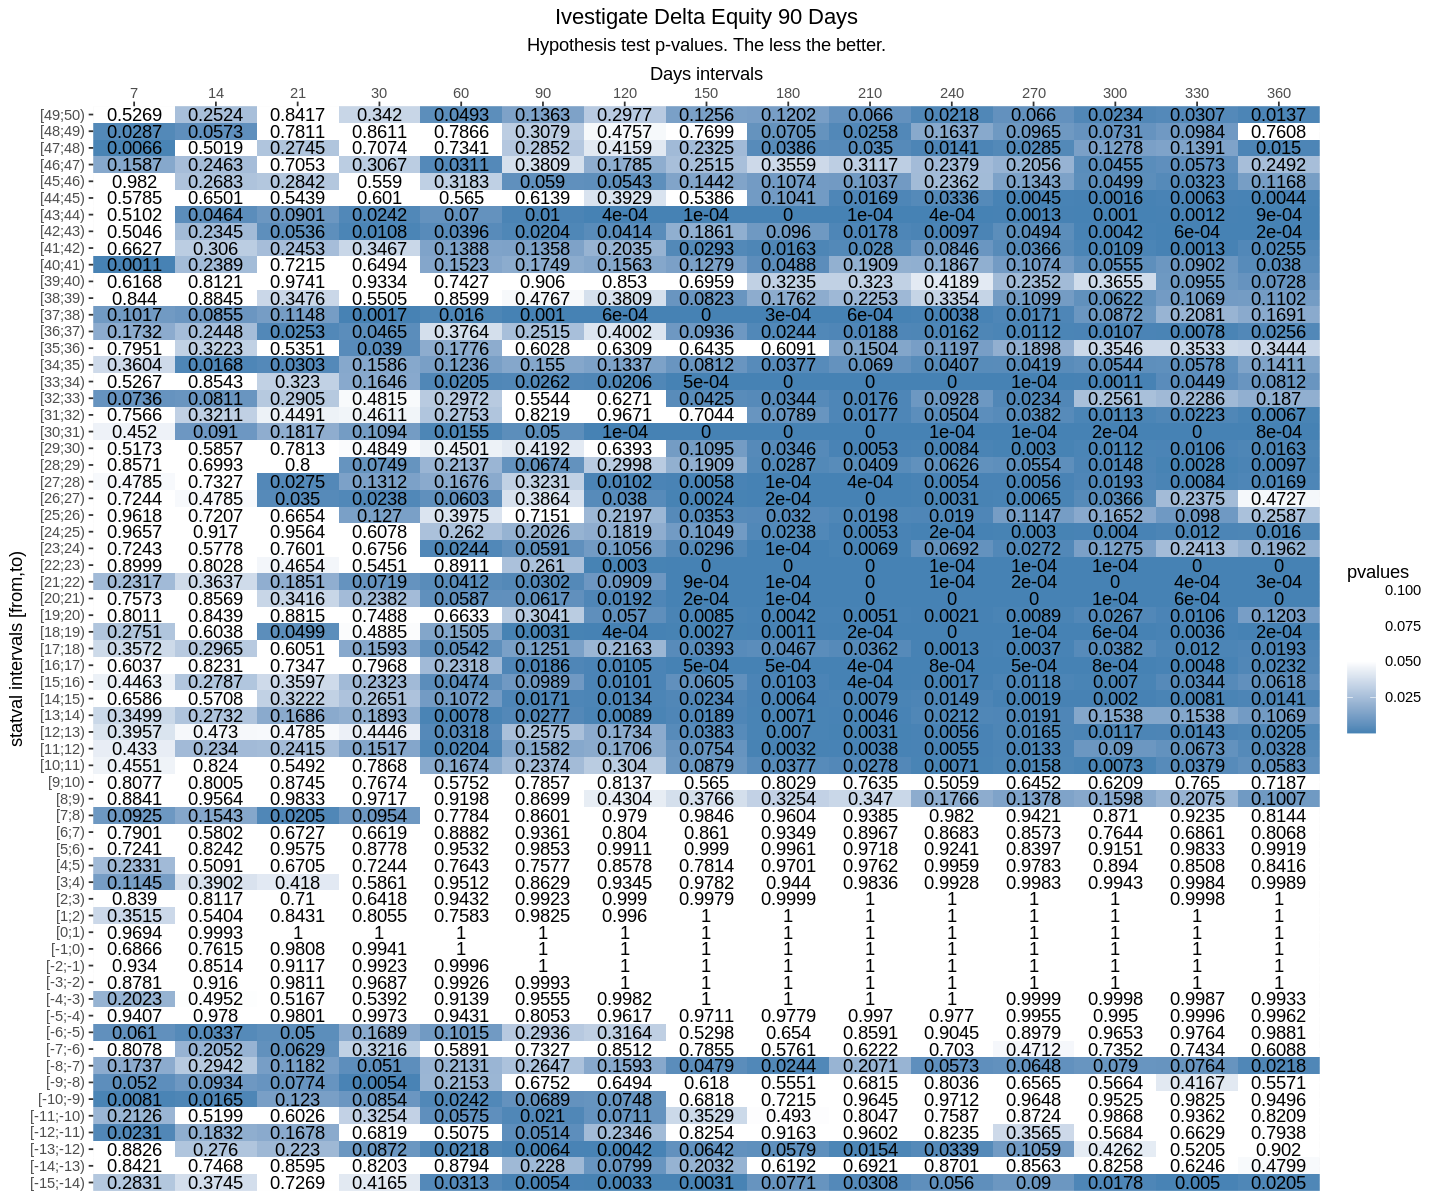

In [5]:
experiment = list(
  name = "deltaequityp90",
  description = "Ivestigate Delta Equity 90 Days",
  sqlText = sql, # the sql above  
  attributeName = "statval",
  attributeSteps = seq(from = -15, to = 50, by = 1))
result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


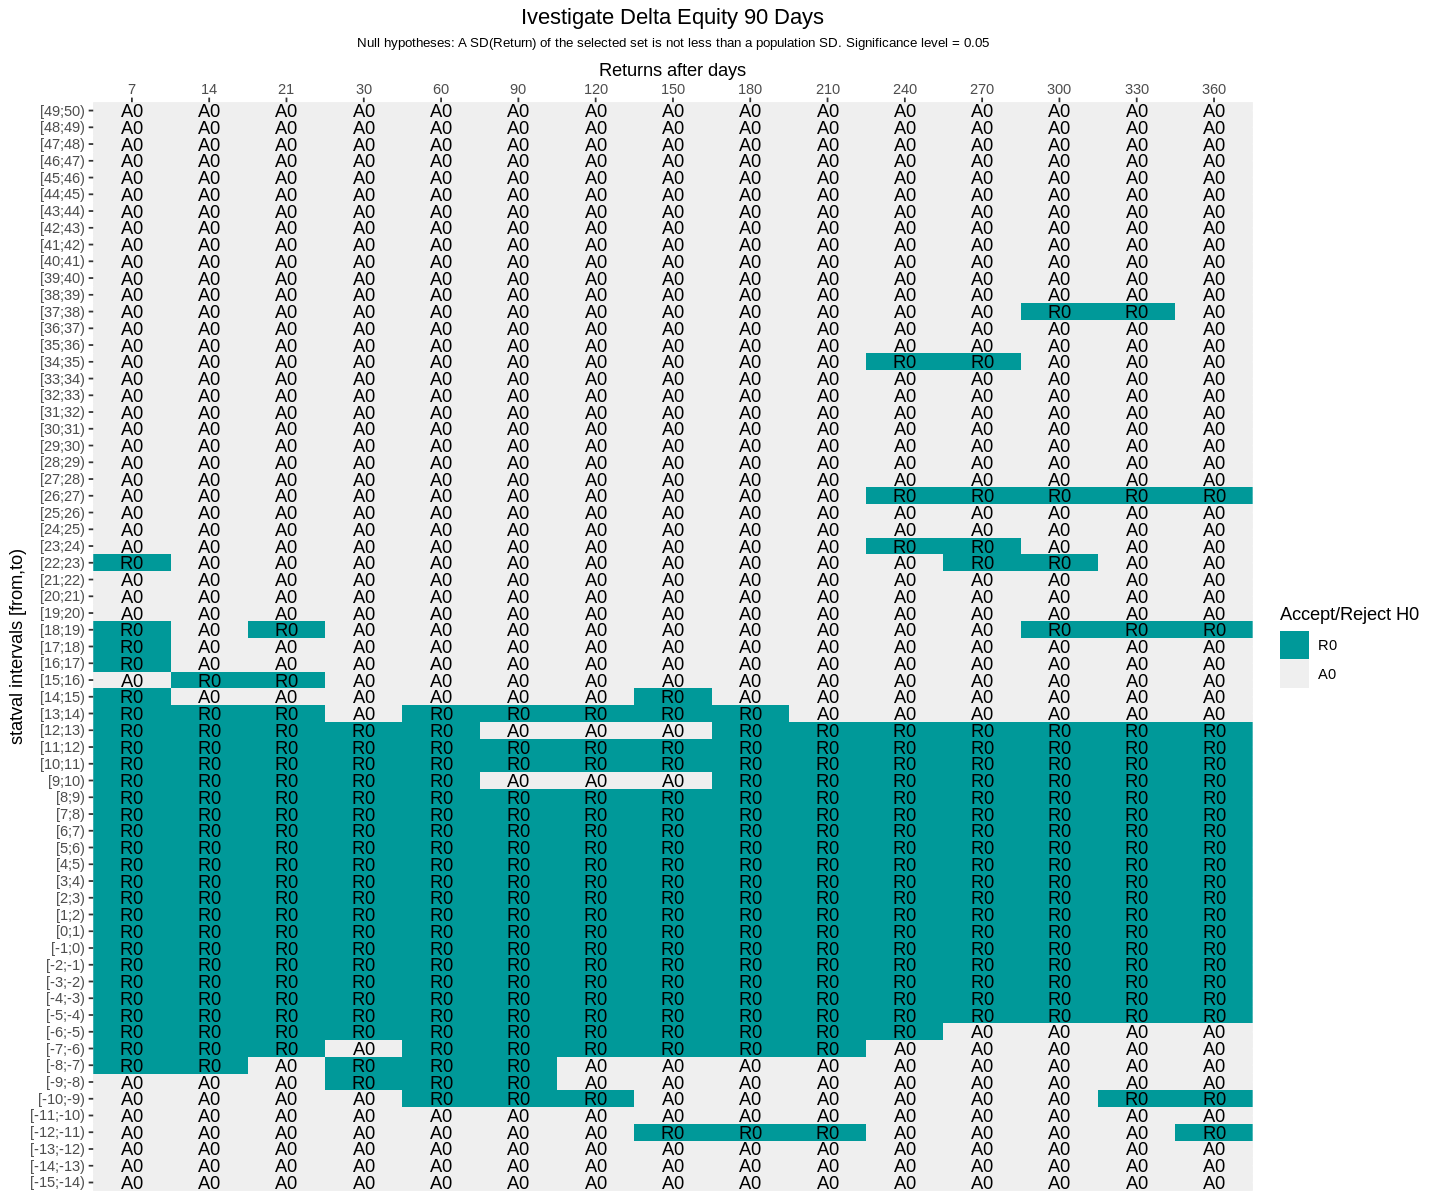

In [6]:
showSDLessHypothesisTest(experiment, result)

In [7]:
showObservationsCounts(experiment, result) 


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection            Obs007 Obs014 Obs021 Obs030 Obs060 Obs090 Obs120 Obs150
1  49 <= statval < 50    63     62     60     60     54     51     44     39   
2  48 <= statval < 49    75     74     73     72     68     61     59     57   
3  47 <= statval < 48    85     82     79     77     71     66     58     56   
4  46 <= statval < 47    61     60     58     56     48     46     40     39   
5  45 <= statval < 46    85     83     83     82     78     74     66     64   
6  44 <= statval < 45   100    100     98     94     87     80     74     70   
7  43 <= statval < 44    87     85     84     82     73     69     64     58   
8  42 <= statval < 43   104    103    100     96     90     82     81     75   
9  41 <= statval < 42   108    106    101     99     95     91     83     73   
10 40 <= statval < 41   104    102     98     96     87     78     71     67   
11 39 <= statval < 40   124    119    112    108    103     92     88     81   
12 38 <= statval < 39   106    105    104    100     93     85     77     70   
13 37 <= statval < 38   140    139    136    128    120    109    101     90   
14 36 <= statval < 37   134    133    129    124    115    109     99     91   
15 35 <= statval < 36   143    139    134    127    113    106     99     85   
16 34 <= statval < 35   147    143    143    138    128    121    109    102   
17 33 <= statval < 34   191    187    184    178    164    151    141    134   
18 32 <= statval < 33   190    186    184    179    162    151    141    124   
19 31 <= statval < 32   219    216    211    207    188    178    170    149   
20 30 <= statval < 31   186    181    176    170    151    148    136    127   
21 29 <= statval < 30   220    218    215    208    197    181    170    147   
22 28 <= statval < 29   267    265    260    253    230    212    201    186   
23 27 <= statval < 28   281    279    268    265    247    230    211    195   
24 26 <= statval < 27   297    293    285    273    254    233    216    195   
25 25 <= statval < 26   347    342    337    325    298    282    251    226   
26 24 <= statval < 25   341    330    323    318    296    268    242    228   
27 23 <= statval < 24   364    358    352    338    306    282    253    231   
28 22 <= statval < 23   425    421    412    399    374    342    307    291   
29 21 <= statval < 22   469    457    445    437    409    364    331    307   
30 20 <= statval < 21   510    499    490    474    431    402    363    333   
⋮  ⋮                    ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮     
36 14 <= statval < 15    891    876    845    811    743    668    605    547  
37 13 <= statval < 14   1013    990    973    952    865    798    717    659  
38 12 <= statval < 13   1135   1117   1090   1061    971    891    804    737  
39 11 <= statval < 12   1318   1297   1277   1223   1107    993    885    806  
40 10 <= statval < 11   1436   1407   1374   1332   1225   1111    992    900  
41 9 <= statval < 10    1509   1475   1442   1385   1252   1146   1016    915  
42 8 <= statval < 9     1715   1686   1644   1578   1409   1266   1153   1050  
43 7 <= statval < 8     1795   1752   1709   1649   1481   1349   1228   1106  
44 6 <= statval < 7     1993   1951   1913   1835   1658   1480   1333   1196  
45 5 <= statval < 6     2176   2131   2062   1969   1757   1588   1413   1276  
46 4 <= statval < 5     2350   2293   2246   2148   1930   1748   1558   1421  
47 3 <= statval < 4     2544   2498   2446   2365   2126   1912   1706   1548  
48 2 <= statval < 3     2777   2705   2636   2555   2305   2110   1907   1711  
49 1 <= statval < 2     2926   2849   2781   2697   2375   2119   1891   1712  
50 0 <= statval < 1     7187   7070   6942   6744   6168   5680   5239   4841  
51 -1 <= statval < 0    5421   5257   5090   4888   4353   3870   3439   3067  
52 -2 <= statval < -1   3348   3243   3143   3009   2633   2338   2049   1807  
53 -3 <= statval < -2   2565   2470   2395   2277   1999   1770   1547   1384  
54 


SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



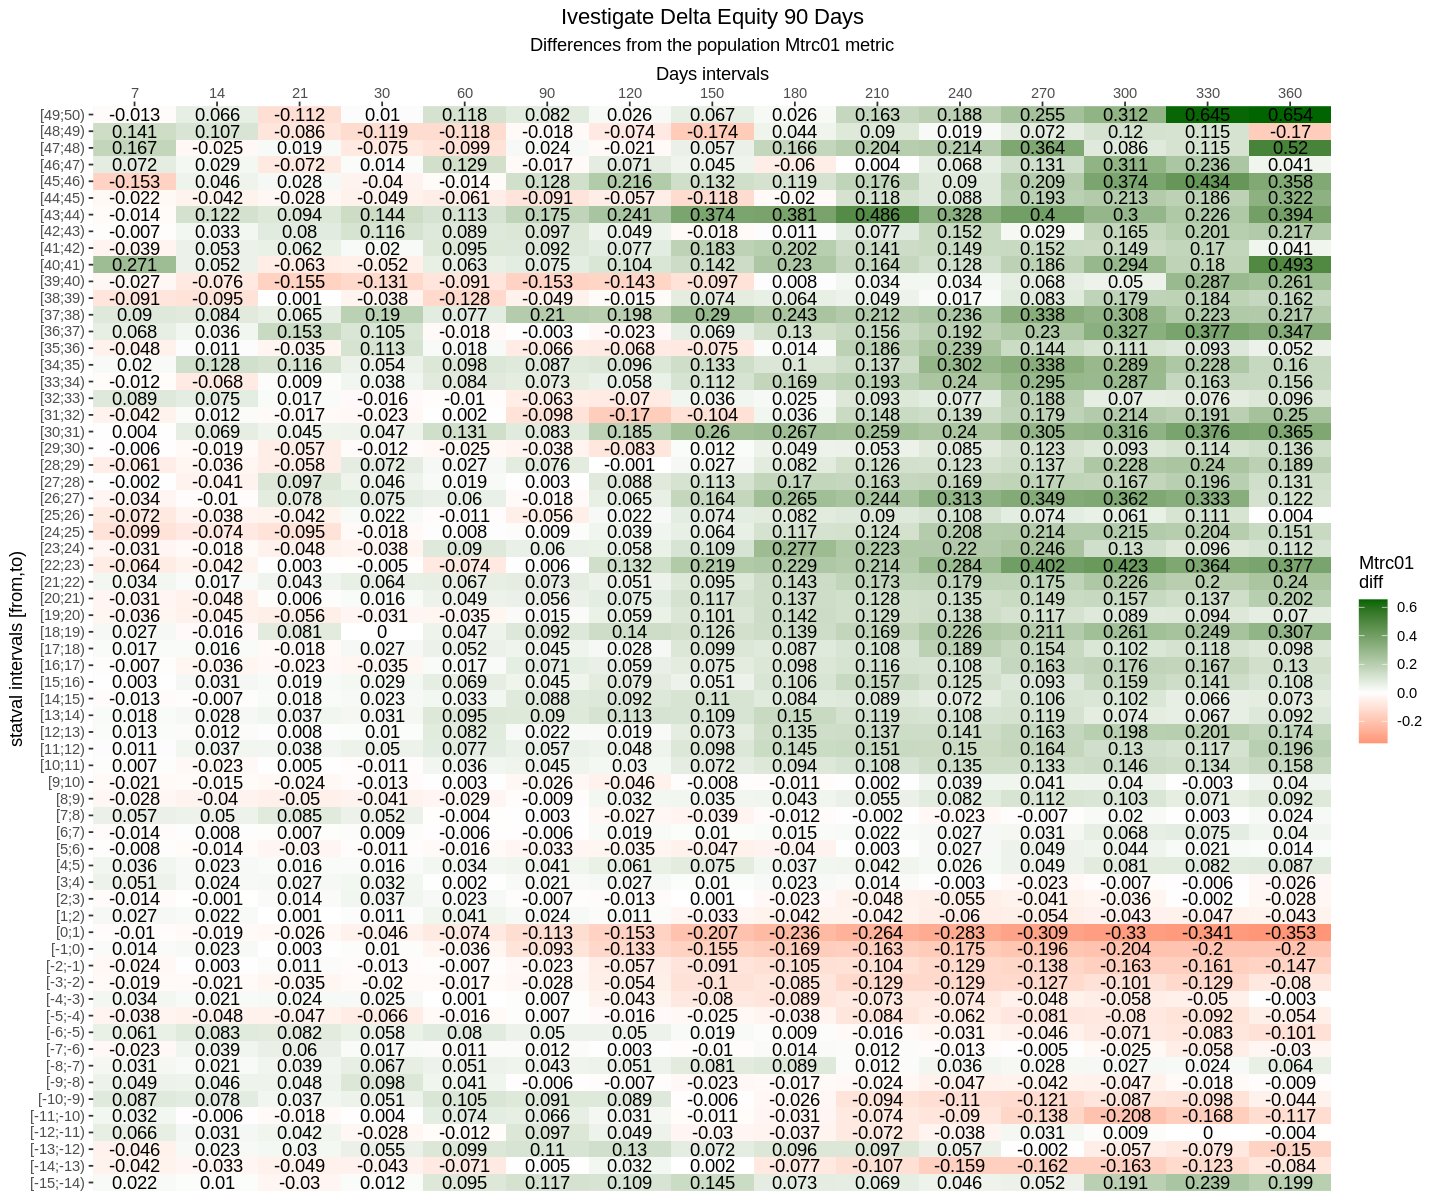

In [8]:
showMetricDifferences(experiment, result)

In [9]:
showSystemsCounts(experiment, result)



Numbers of strategies observed in defined intervals.

Selection            Sys007 Sys014 Sys021 Sys030 Sys060 Sys090 Sys120 Sys150
1  49 <= statval < 50    53     52     50     50     44     41     35     30   
2  48 <= statval < 49    60     59     58     57     54     50     48     47   
3  47 <= statval < 48    72     69     66     64     58     53     45     44   
4  46 <= statval < 47    58     57     55     53     45     43     37     36   
5  45 <= statval < 46    73     71     71     70     66     64     56     54   
6  44 <= statval < 45    78     78     77     73     66     60     56     53   
7  43 <= statval < 44    78     76     75     73     64     60     55     49   
8  42 <= statval < 43    86     86     83     79     75     69     68     63   
9  41 <= statval < 42    84     83     78     76     72     69     62     57   
10 40 <= statval < 41    87     85     81     81     73     64     59     56   
11 39 <= statval < 40   103     99     93     89     84     75     71     66   
12 38 <= statval < 39    86     85     84     80     75     71     63     58   
13 37 <= statval < 38   112    111    108    100     92     84     78     69   
14 36 <= statval < 37   105    104    100     97     89     84     76     70   
15 35 <= statval < 36   106    103    100     97     87     82     77     67   
16 34 <= statval < 35   114    110    110    105     95     89     82     77   
17 33 <= statval < 34   137    134    132    129    117    108    101     96   
18 32 <= statval < 33   145    141    140    136    120    112    104     91   
19 31 <= statval < 32   161    159    156    152    136    128    122    107   
20 30 <= statval < 31   149    145    142    136    117    114    104     97   
21 29 <= statval < 30   163    161    160    153    142    130    121    105   
22 28 <= statval < 29   189    187    182    176    162    149    139    128   
23 27 <= statval < 28   205    204    194    191    175    164    149    139   
24 26 <= statval < 27   216    212    205    196    188    170    160    145   
25 25 <= statval < 26   235    231    227    218    198    184    165    150   
26 24 <= statval < 25   227    218    212    208    193    173    155    146   
27 23 <= statval < 24   253    248    243    234    211    191    173    159   
28 22 <= statval < 23   266    262    256    245    230    209    186    175   
29 21 <= statval < 22   288    281    272    265    245    217    197    180   
30 20 <= statval < 21   312    305    301    289    261    239    216    198   
⋮  ⋮                    ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮     
36 14 <= statval < 15    476   466    451    435    394    351    326    293   
37 13 <= statval < 14    504   496    488    477    427    388    350    327   
38 12 <= statval < 13    532   523    505    487    438    388    348    319   
39 11 <= statval < 12    593   584    573    541    489    435    392    350   
40 10 <= statval < 11    612   597    580    563    510    461    411    365   
41 9 <= statval < 10     650   635    627    601    528    478    425    376   
42 8 <= statval < 9      706   690    672    639    561    495    447    409   
43 7 <= statval < 8      722   705    684    661    585    521    466    413   
44 6 <= statval < 7      768   749    731    699    615    544    474    417   
45 5 <= statval < 6      804   787    768    736    642    569    505    451   
46 4 <= statval < 5      828   793    778    745    657    582    510    457   
47 3 <= statval < 4      829   812    792    769    674    598    524    472   
48 2 <= statval < 3      866   838    812    773    681    623    559    491   
49 1 <= statval < 2      883   859    829    800    697    591    523    475   
50 0 <= statval < 1      956   924    898    848    736    655    583    516   
51 -1 <= statval < 0    1005   969    936    896    779    667    583    511   
52 -2 <= statval < -1    892   859    827    787    677    599    519    460   
53 -3 <= statval < -2    833   793    767    723    623    538    472    423   
54 

### Discussion

Daniil: Use the DeltaEquity90Days attribute with a negative value, this makes it possible to send good strategies in the top, despite a slight drawdown (7%). 
The idea is that everyone has loss periods, and this is not a reason to downgrade too much. 

## Age > 90

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        2126       67802    -15.0000     -1.7000      1.5000      4.4451      9.0000     50.0000     10.8314 


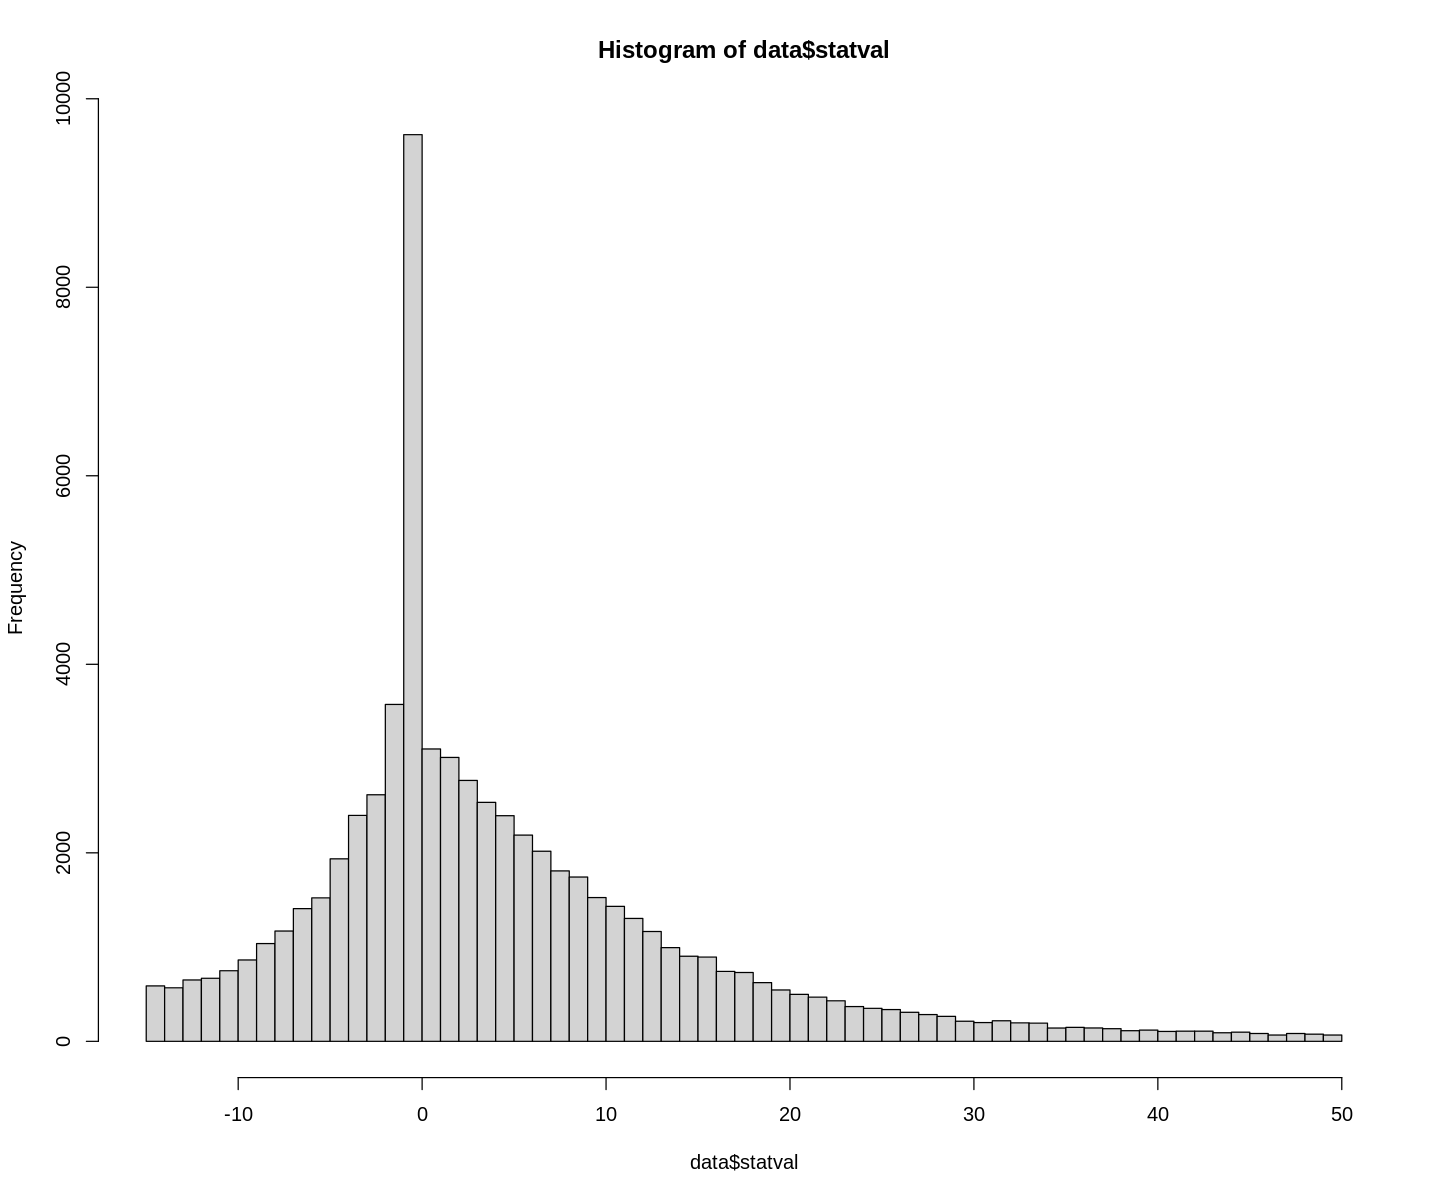

In [10]:
# Join with cleaned data. 
# Further investigation shows that we can accept small negative values too. 
sql = "select statval, eq.*
 from ReturnsDataInIntervalsCleanedSkip090 eq
 join historical_stats_modern h on h.systemid=eq.systemid and h.date = DateStart
 where statname='deltaequityp90' and  statval >= -15 and statval <= 50 and Age > 90"

data = getC2ScoreDbData(sql)
overview(data)
hist(data$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        2126       67802    -15.0000     -1.7000      1.5000      4.4451      9.0000     50.0000     10.8314 



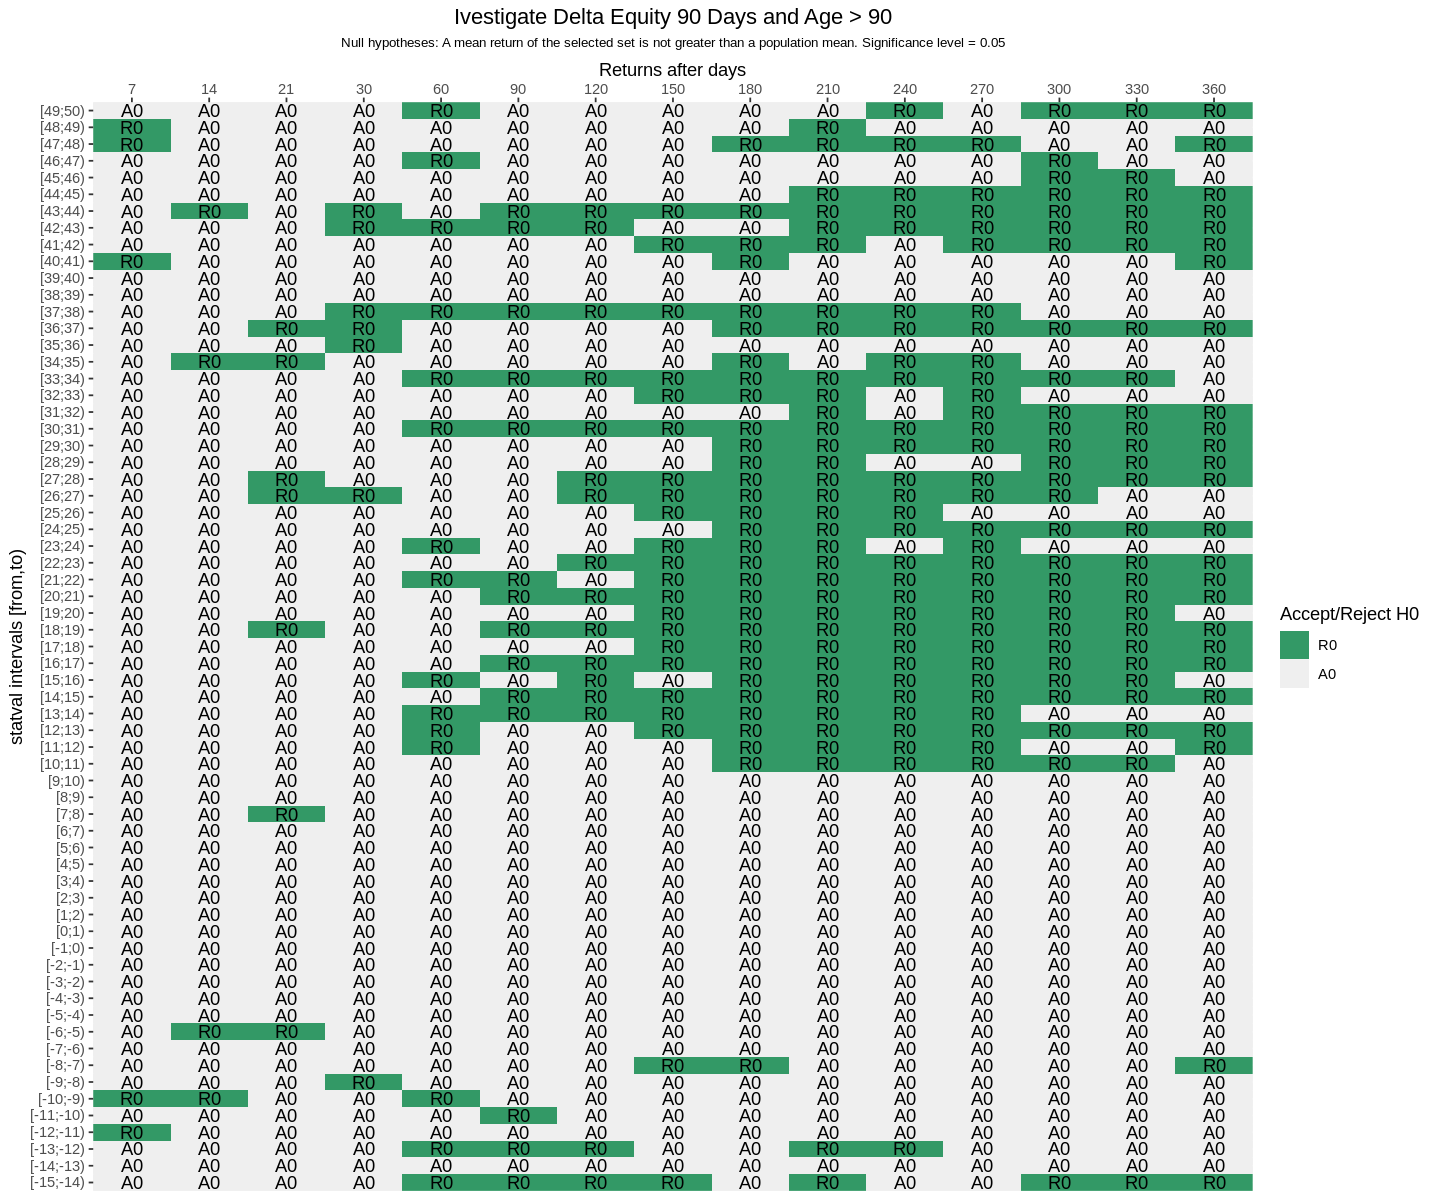

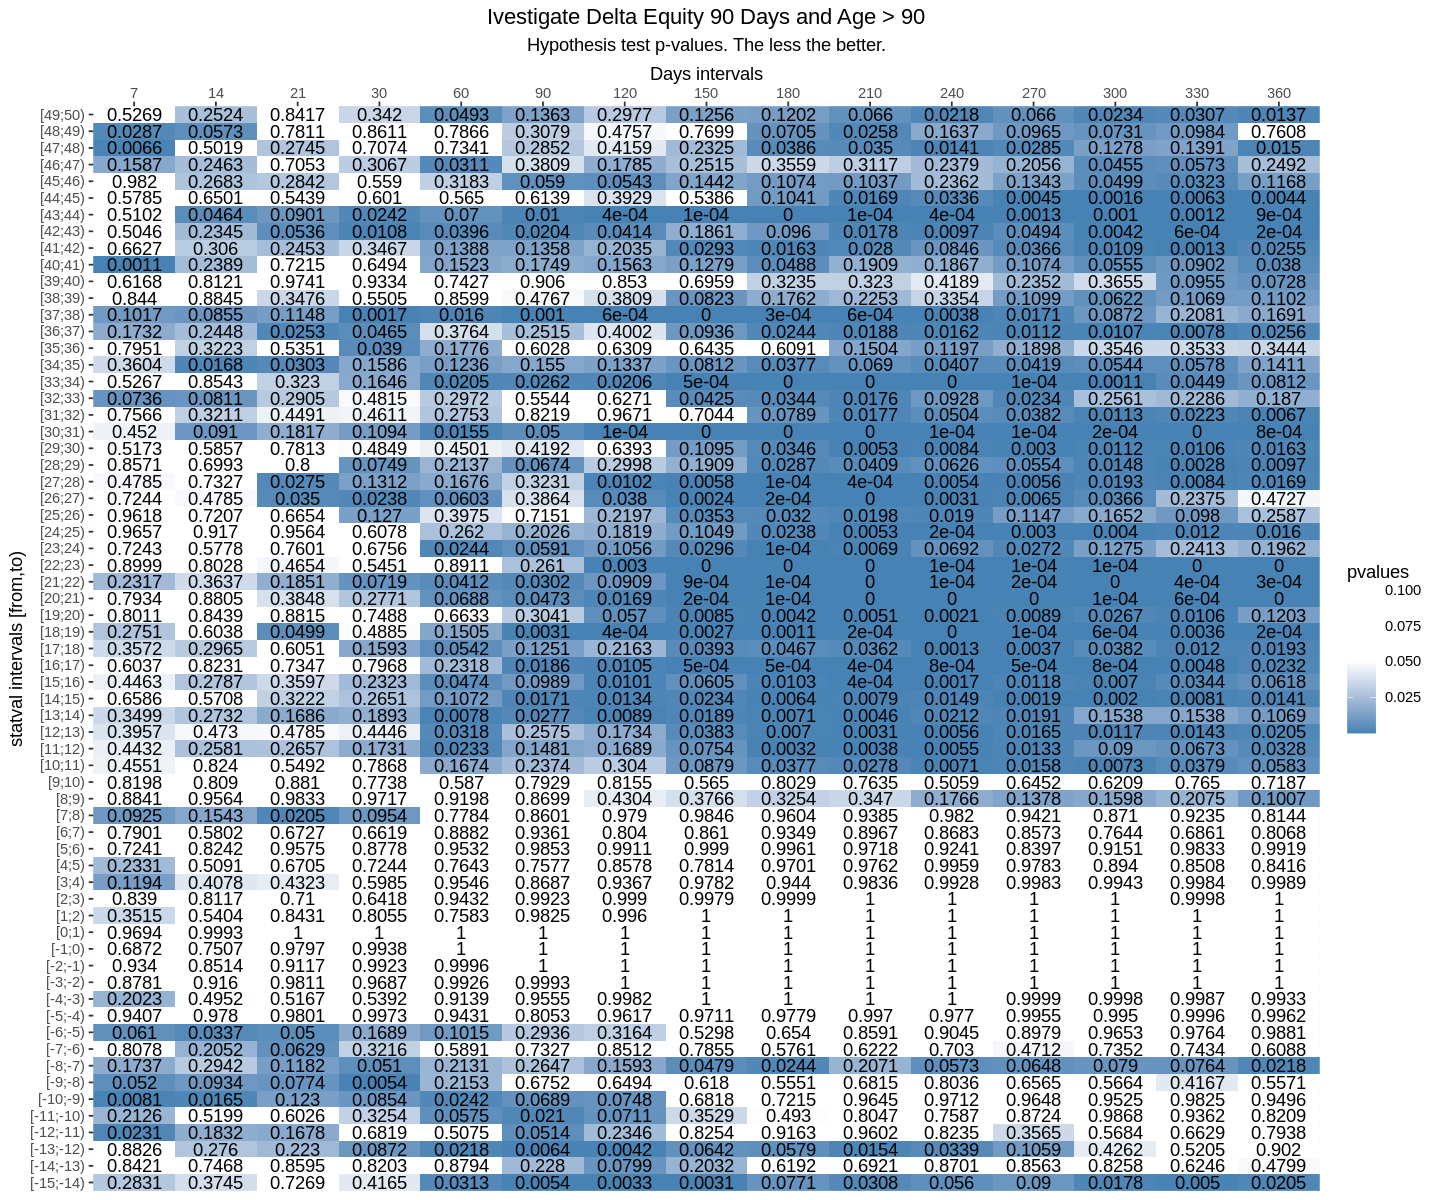

In [11]:
experiment = list(
  name = "deltaequityp90 and Age > 90",
  description = "Ivestigate Delta Equity 90 Days and Age > 90",
  sqlText = sql, # the sql above  
  attributeName = "statval",
  attributeSteps = seq(from = -15, to = 50, by = 1))
result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


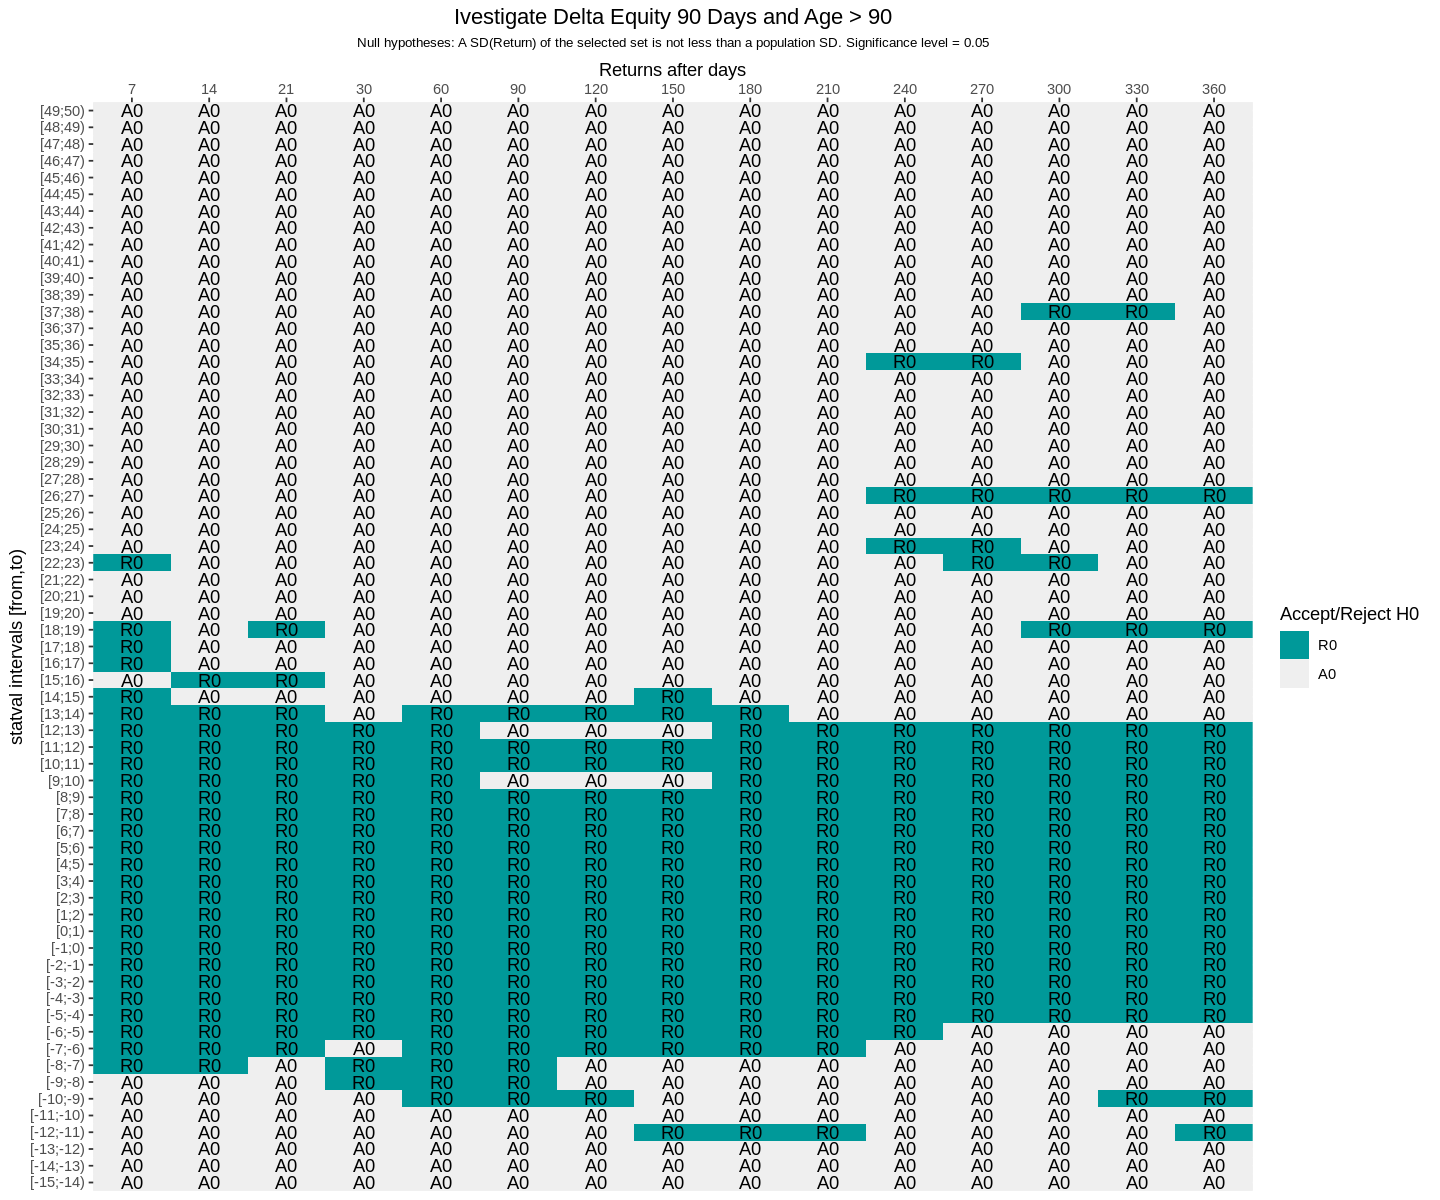

In [12]:
showSDLessHypothesisTest(experiment, result)

In [13]:
showObservationsCounts(experiment, result) 


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection            Obs007 Obs014 Obs021 Obs030 Obs060 Obs090 Obs120 Obs150
1  49 <= statval < 50    63     62     60     60     54     51     44     39   
2  48 <= statval < 49    75     74     73     72     68     61     59     57   
3  47 <= statval < 48    85     82     79     77     71     66     58     56   
4  46 <= statval < 47    61     60     58     56     48     46     40     39   
5  45 <= statval < 46    85     83     83     82     78     74     66     64   
6  44 <= statval < 45   100    100     98     94     87     80     74     70   
7  43 <= statval < 44    87     85     84     82     73     69     64     58   
8  42 <= statval < 43   104    103    100     96     90     82     81     75   
9  41 <= statval < 42   108    106    101     99     95     91     83     73   
10 40 <= statval < 41   104    102     98     96     87     78     71     67   
11 39 <= statval < 40   124    119    112    108    103     92     88     81   
12 38 <= statval < 39   106    105    104    100     93     85     77     70   
13 37 <= statval < 38   140    139    136    128    120    109    101     90   
14 36 <= statval < 37   134    133    129    124    115    109     99     91   
15 35 <= statval < 36   143    139    134    127    113    106     99     85   
16 34 <= statval < 35   147    143    143    138    128    121    109    102   
17 33 <= statval < 34   191    187    184    178    164    151    141    134   
18 32 <= statval < 33   190    186    184    179    162    151    141    124   
19 31 <= statval < 32   219    216    211    207    188    178    170    149   
20 30 <= statval < 31   186    181    176    170    151    148    136    127   
21 29 <= statval < 30   220    218    215    208    197    181    170    147   
22 28 <= statval < 29   267    265    260    253    230    212    201    186   
23 27 <= statval < 28   281    279    268    265    247    230    211    195   
24 26 <= statval < 27   297    293    285    273    254    233    216    195   
25 25 <= statval < 26   347    342    337    325    298    282    251    226   
26 24 <= statval < 25   341    330    323    318    296    268    242    228   
27 23 <= statval < 24   364    358    352    338    306    282    253    231   
28 22 <= statval < 23   425    421    412    399    374    342    307    291   
29 21 <= statval < 22   469    457    445    437    409    364    331    307   
30 20 <= statval < 21   509    498    489    473    430    401    362    333   
⋮  ⋮                    ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮     
36 14 <= statval < 15    891    876    845    811    743    668    605    547  
37 13 <= statval < 14   1013    990    973    952    865    798    717    659  
38 12 <= statval < 13   1135   1117   1090   1061    971    891    804    737  
39 11 <= statval < 12   1317   1296   1276   1222   1106    992    884    806  
40 10 <= statval < 11   1436   1407   1374   1332   1225   1111    992    900  
41 9 <= statval < 10    1508   1474   1441   1384   1251   1145   1015    915  
42 8 <= statval < 9     1715   1686   1644   1578   1409   1266   1153   1050  
43 7 <= statval < 8     1795   1752   1709   1649   1481   1349   1228   1106  
44 6 <= statval < 7     1993   1951   1913   1835   1658   1480   1333   1196  
45 5 <= statval < 6     2176   2131   2062   1969   1757   1588   1413   1276  
46 4 <= statval < 5     2350   2293   2246   2148   1930   1748   1558   1421  
47 3 <= statval < 4     2543   2497   2445   2364   2125   1911   1705   1548  
48 2 <= statval < 3     2777   2705   2636   2555   2305   2110   1907   1711  
49 1 <= statval < 2     2926   2849   2781   2697   2375   2119   1891   1712  
50 0 <= statval < 1     7187   7070   6942   6744   6168   5680   5239   4841  
51 -1 <= statval < 0    5420   5256   5089   4887   4352   3869   3438   3067  
52 -2 <= statval < -1   3348   3243   3143   3009   2633   2338   2049   1807  
53 -3 <= statval < -2   2565   2470   2395   2277   1999   1770   1547   1384  
54 


SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



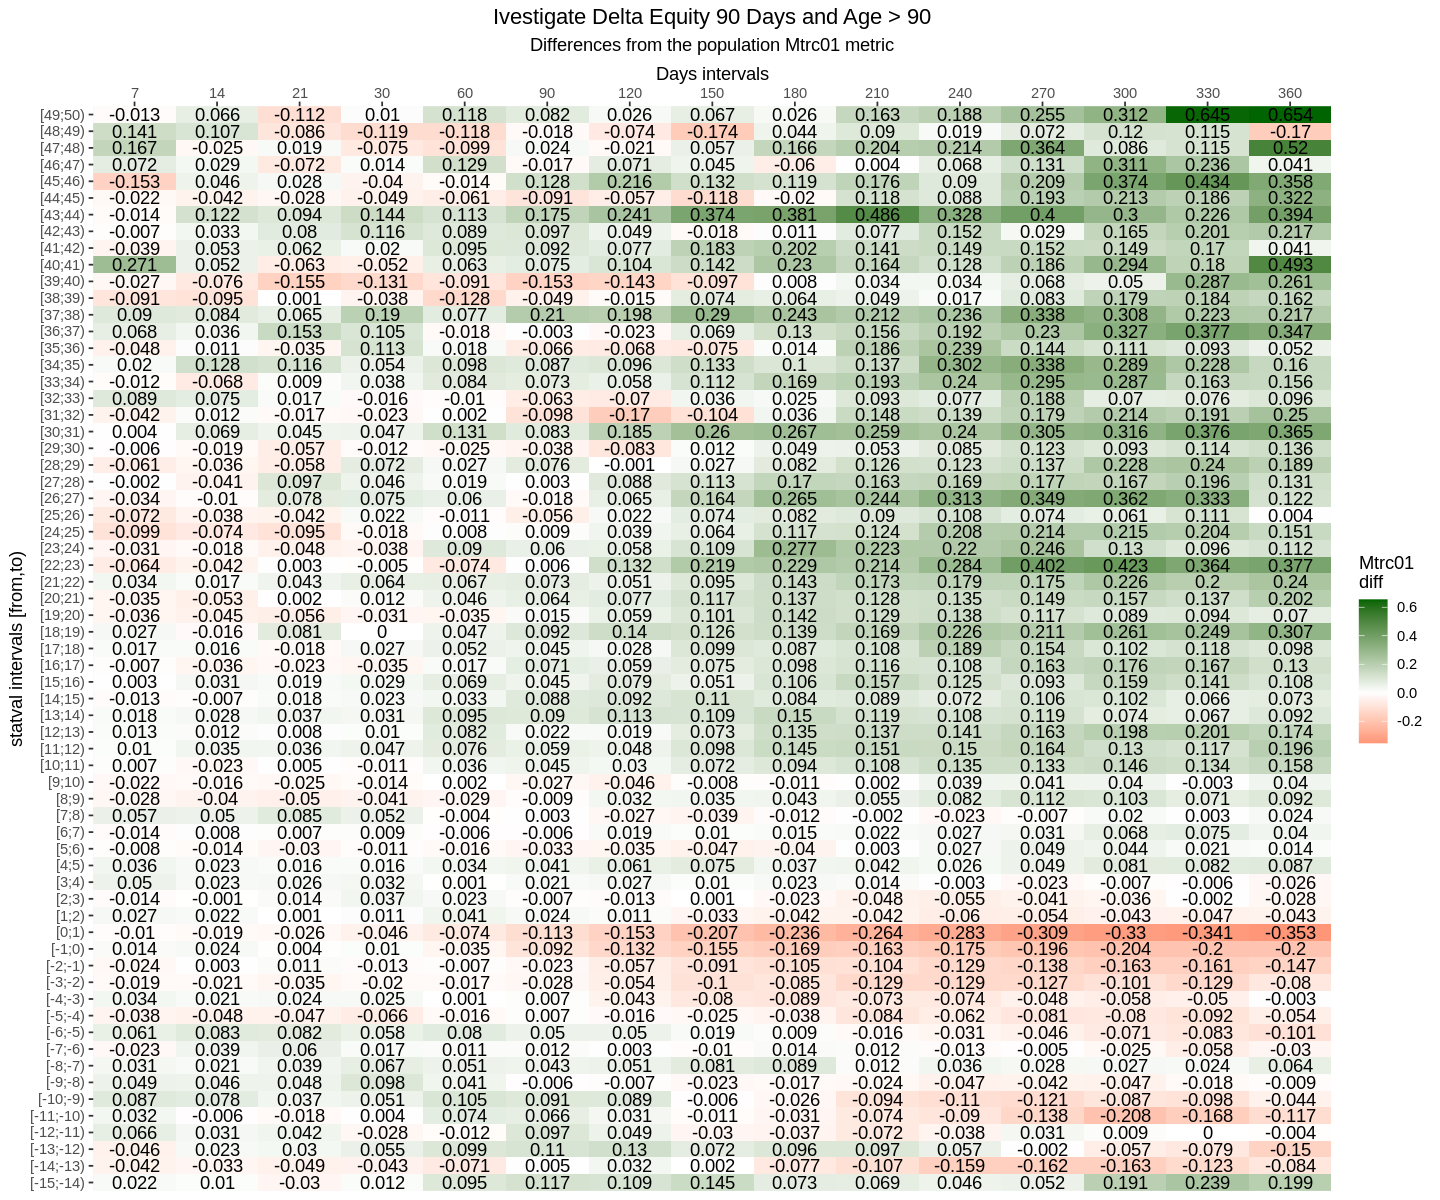

In [14]:
showMetricDifferences(experiment, result)

In [15]:
showSystemsCounts(experiment, result)



Numbers of strategies observed in defined intervals.

Selection            Sys007 Sys014 Sys021 Sys030 Sys060 Sys090 Sys120 Sys150
1  49 <= statval < 50    53     52     50     50     44     41     35     30   
2  48 <= statval < 49    60     59     58     57     54     50     48     47   
3  47 <= statval < 48    72     69     66     64     58     53     45     44   
4  46 <= statval < 47    58     57     55     53     45     43     37     36   
5  45 <= statval < 46    73     71     71     70     66     64     56     54   
6  44 <= statval < 45    78     78     77     73     66     60     56     53   
7  43 <= statval < 44    78     76     75     73     64     60     55     49   
8  42 <= statval < 43    86     86     83     79     75     69     68     63   
9  41 <= statval < 42    84     83     78     76     72     69     62     57   
10 40 <= statval < 41    87     85     81     81     73     64     59     56   
11 39 <= statval < 40   103     99     93     89     84     75     71     66   
12 38 <= statval < 39    86     85     84     80     75     71     63     58   
13 37 <= statval < 38   112    111    108    100     92     84     78     69   
14 36 <= statval < 37   105    104    100     97     89     84     76     70   
15 35 <= statval < 36   106    103    100     97     87     82     77     67   
16 34 <= statval < 35   114    110    110    105     95     89     82     77   
17 33 <= statval < 34   137    134    132    129    117    108    101     96   
18 32 <= statval < 33   145    141    140    136    120    112    104     91   
19 31 <= statval < 32   161    159    156    152    136    128    122    107   
20 30 <= statval < 31   149    145    142    136    117    114    104     97   
21 29 <= statval < 30   163    161    160    153    142    130    121    105   
22 28 <= statval < 29   189    187    182    176    162    149    139    128   
23 27 <= statval < 28   205    204    194    191    175    164    149    139   
24 26 <= statval < 27   216    212    205    196    188    170    160    145   
25 25 <= statval < 26   235    231    227    218    198    184    165    150   
26 24 <= statval < 25   227    218    212    208    193    173    155    146   
27 23 <= statval < 24   253    248    243    234    211    191    173    159   
28 22 <= statval < 23   266    262    256    245    230    209    186    175   
29 21 <= statval < 22   288    281    272    265    245    217    197    180   
30 20 <= statval < 21   311    304    300    288    260    238    215    198   
⋮  ⋮                    ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮     
36 14 <= statval < 15    476   466    451    435    394    351    326    293   
37 13 <= statval < 14    504   496    488    477    427    388    350    327   
38 12 <= statval < 13    532   523    505    487    438    388    348    319   
39 11 <= statval < 12    592   583    572    540    488    434    391    350   
40 10 <= statval < 11    612   597    580    563    510    461    411    365   
41 9 <= statval < 10     649   634    626    600    527    477    424    376   
42 8 <= statval < 9      706   690    672    639    561    495    447    409   
43 7 <= statval < 8      722   705    684    661    585    521    466    413   
44 6 <= statval < 7      768   749    731    699    615    544    474    417   
45 5 <= statval < 6      804   787    768    736    642    569    505    451   
46 4 <= statval < 5      828   793    778    745    657    582    510    457   
47 3 <= statval < 4      829   812    792    768    673    597    523    472   
48 2 <= statval < 3      866   838    812    773    681    623    559    491   
49 1 <= statval < 2      883   859    829    800    697    591    523    475   
50 0 <= statval < 1      956   924    898    848    736    655    583    516   
51 -1 <= statval < 0    1004   968    935    895    778    666    582    511   
52 -2 <= statval < -1    892   859    827    787    677    599    519    460   
53 -3 <= statval < -2    833   793    767    723    623    538    472    423   
54 

### Discussion

Daniil: Use the DeltaEquity90Days attribute with a negative value, this makes it possible to send good strategies in the top, despite a slight drawdown (7%). 
The idea is that everyone has loss periods, and this is not a reason to downgrade too much.